# Extract the PDB files 

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

DATA_PATH = "../../../../../data/training_data_M1.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv(DATA_PATH, sep="\t")

print(data.shape)

data.head()

(1101, 104)


,Mutation_Effect_Label,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,Domain_definitions,Template_cath_id,Template_sequence_identity,Alignment_score,Interactor_UniProt_ID,Interactor_domain_name,Interactor_domain_clan,Interactor_domain_definitions,Interactor_template_cath_id,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,Provean_score,Matrix_score,Secondary_structure_wt,Secondary_structure_mut,Solvent_accessibility_wt,Solvent_accessibility_mut,pcv_salt_equal_wt,pcv_salt_opposite_wt,pcv_hbond_wt,pcv_vdW_wt,pcv_salt_equal_mut,pcv_salt_opposite_mut,pcv_hbond_mut,pcv_vdW_mut,pcv_salt_equal_self_wt,pcv_salt_opposite_self_wt,pcv_hbond_self_wt,pcv_vdW_self_wt,pcv_salt_equal_self_mut,pcv_salt_opposite_self_mut,pcv_hbond_self_mut,pcv_vdW_self_mut,dg_wt,backbone_hbond_wt,sidechain_hbond_wt,van_der_waals_wt,electrostatics_wt,solvation_polar_wt,solvation_hydrophobic_wt,van_der_waals_clashes_wt,entropy_sidechain_wt,entropy_mainchain_wt,sloop_entropy_wt,mloop_entropy_wt,cis_bond_wt,torsional_clash_wt,backbone_clash_wt,helix_dipole_wt,water_bridge_wt,disulfide_wt,electrostatic_kon_wt,partial_covalent_bonds_wt,energy_ionisation_wt,entropy_complex_wt,number_of_residues_wt,dg_mut,backbone_hbond_mut,sidechain_hbond_mut,van_der_waals_mut,electrostatics_mut,solvation_polar_mut,solvation_hydrophobic_mut,van_der_waals_clashes_mut,entropy_sidechain_mut,entropy_mainchain_mut,sloop_entropy_mut,mloop_entropy_mut,cis_bond_mut,torsional_clash_mut,backbone_clash_mut,helix_dipole_mut,water_bridge_mut,disulfide_mut,electrostatic_kon_mut,partial_covalent_bonds_mut,energy_ionisation_mut,entropy_complex_mut,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,Ras,1:177,2vrwA,1.0,0.921875,Q14155,RhoGEF,RhoGEF,259:459,2vrwB,0.2432,0.253076,1.72835,0.9981741060182685,0.009480022825300694,1.7654914439219185,-1.14785,-6.338,-3.0,hydrogen bonded turn,hydrogen bonded turn,24.8016,31.444,0,0,0,11,0,0,0,15,0,0,4,24,0,0,0,26,-10.8507,-2.08654,-3.62604,-19.2446,-2.82609,23.8666,-27.1192,3.44873,11.1043,2.46978,0.0,0.0,0.0,1.42441,3.72488,-0.132308,0.0,0.0,-0.548728,0.0,0.035025,2.384,378.0,-11.8032,-2.0983,-3.62604,-19.6566,-2.85434,24.0298,-28.0708,3.55148,11.178,2.55424,0.0,0.0,0.0,1.45134,3.95375,-0.132308,0.0,0.0,-0.548728,0.0,0.035025,2.384,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
1,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,Ras,1:177,2vrwA,1.0,0.921875,Q14155-1,RhoGEF,RhoGEF,81:281,2vrwB,0.2432,0.253076,1.72835,0.9981741060182685,0.009480022825300694,1.7654914439219185,-1.14785,-6.338,-3.0,hydrogen bonded turn,hydrogen bonded turn,24.8016,31.444,0,0,0,11,0,0,0,15,0,0,4,24,0,0,0,26,-10.8507,-2.08654,-3.62604,-19.2446,-2.82609,23.8666,-27.1192,3.44873,11.1043,2.46978,0.0,0.0,0.0,1.42441,3.72488,-0.132308,0.0,0.0,-0.548728,0.0,0.035025,2.384,378.0,-11.8032,-2.0983,-3.62604,-19.6566,-2.85434,24.0298,-28.0708,3.55148,11.178,2.55424,0.0,0.0,0.0,1.45134,3.95375,-0.132308,0.0,0.0,-0.548728,0.0,0.035025,2.384,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
2,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,Ras,1:177,2vrwA,1.0,0.921875,Q14155-2,RhoGEF,RhoGEF,209:409,2vrwB,0.2432,0.253076,1.72835,0.9981741060182685,0.009480022825300694,1.7654914439219185,-1.14785,-6.338,-3.0,hydrogen bonded turn,hydrogen bonded turn,24.8016,31.444,0,0,0,11,0,0,0,15,0,0,4,24,0,0,0,26,-10.8507,-2.08654,-3.62604,-19.2446,-2.82609,23.8666,-27.1192,3.44873,11.1043,2.46978,0.0,0.0,0.0,1.42441,3.72488,-0.132308,0.0,0.0,-0.548728,0.0,0.035025,2.384,378.0,-11.803

In [3]:
# Filter the data to keep following columns: Mutation_Effect_Label, uniprot_id, mutation, interactor_uniprot_id, template_cath_id, interactor_template_cath_id
data_filtered = data[['Mutation_Effect_Label', 'UniProt_ID', 'Mutation', 'Interactor_UniProt_ID', 'Template_cath_id', 'Interactor_template_cath_id']].copy()

print(data_filtered.shape)

# Template_cath_id_pdb is the column that contains the template_cath_id's first 4 characters
data_filtered = data_filtered.assign(Template_cath_id_pdb = data_filtered.Template_cath_id.str[0:4])

# Chain_id is the column that contains the last character of the template_cath_id
data_filtered = data_filtered.assign(Chain_id = data_filtered.Template_cath_id.str[-1])

# Do the samething for interactor_template_cath_id as well
data_filtered = data_filtered.assign(Interactor_template_cath_id_pdb = data_filtered.Interactor_template_cath_id.str[0:4])

# display the first 5 rows of the filtered data
data_filtered.head()

(1101, 6)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_cath_id,Interactor_template_cath_id,Template_cath_id_pdb,Chain_id,Interactor_template_cath_id_pdb
0,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155,2vrwA,2vrwB,2vrw,A,2vrw
1,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-1,2vrwA,2vrwB,2vrw,A,2vrw
2,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-2,2vrwA,2vrwB,2vrw,A,2vrw
3,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-3,2vrwA,2vrwB,2vrw,A,2vrw
4,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-5,2vrwA,2vrwB,2vrw,A,2vrw


In [4]:
# check if Template_cath_id_pdb and Interactor_template_cath_id_pdb identical
data_filtered.Template_cath_id_pdb.equals(data_filtered.Interactor_template_cath_id_pdb)

True

In [5]:
data_filtered_copy = data_filtered.copy()

# get the unique values of Mutation_Effect_Label
data_filtered_copy['Mutation_Effect_Label'].unique()

array(['mutation decreasing rate(MI:1130)',
       'mutation decreasing(MI:0119)', 'mutation disrupting(MI:0573)',
       'mutation disrupting strength(MI:1128)',
       'mutation with no effect(MI:2226)', 'disrupting',
       'mutation decreasing strength(MI:1133)',
       'mutation increasing(MI:0382)',
       'mutation increasing strength(MI:1132)',
       'mutation disrupting rate(MI:1129)',
       'mutation increasing rate(MI:1131)', 'mutation causing(MI:2227)'],
      dtype=object)

In [6]:
from src.helpers.helpers_predator.preprocessing import mutation_effect_label_binner

In [7]:
train_data = mutation_effect_label_binner(data_filtered_copy)

In [8]:
train_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_cath_id,Interactor_template_cath_id,Template_cath_id_pdb,Chain_id,Interactor_template_cath_id_pdb
0,1,Q9BPZ3,F118A,P11940,1jgnB,1jgnA,1jgn,B,1jgn
1,1,P01116,Y40C,P50749,3ddcA,3ddcB,3ddc,A,3ddc
2,1,Q96QK1,F534D,Q9UBQ0,2r17C,2r17A,2r17,C,2r17
3,1,Q96QK1,F534D,Q9UBQ0-2,2r17C,2r17A,2r17,C,2r17
4,1,O43521-3,G66A,Q07812,3fdlB,3fdlA,3fdl,B,3fdl
...,...,...,...,...,...,...,...,...,...
735,1,P84243,Q94A,Q9UER7-3,4hgaB,4hgaA,4hga,B,4hga
736,1,Q96QK1,L589D,Q9UBQ0,2r17C,2r17A,2r17,C,2r17
737,1,Q96QK1,L589D,Q9UBQ0-2,2r17C,2r17A,2r17,C,2r17
738,1,P23297,F72L,P25815,2y5iA,2y5iB,2y5i,A,2y5i


In [9]:
print(f"Size of train_data: {train_data.shape}")

train_data.head()

Size of train_data: (740, 9)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_cath_id,Interactor_template_cath_id,Template_cath_id_pdb,Chain_id,Interactor_template_cath_id_pdb
0,1,Q9BPZ3,F118A,P11940,1jgnB,1jgnA,1jgn,B,1jgn
1,1,P01116,Y40C,P50749,3ddcA,3ddcB,3ddc,A,3ddc
2,1,Q96QK1,F534D,Q9UBQ0,2r17C,2r17A,2r17,C,2r17
3,1,Q96QK1,F534D,Q9UBQ0-2,2r17C,2r17A,2r17,C,2r17
4,1,O43521-3,G66A,Q07812,3fdlB,3fdlA,3fdl,B,3fdl


In [10]:
# get the unique values of Template_cath_id_pdb and put it in a list
unique_pdb_ids = train_data.Template_cath_id_pdb.unique().tolist()

# print the length of the list
print(f"Length of unique_pdb_ids: {len(unique_pdb_ids)}")

# print the first 10 values of the list
print(unique_pdb_ids[0:10])

Length of unique_pdb_ids: 157
['1jgn', '3ddc', '2r17', '3fdl', '2nl9', '3rep', '1gl2', '1bi7', '2wjv', '3lhr']


## Downloading the PDB files

In [12]:
from utils import download_pdb

In [13]:
# download the pdb files 
for pdb_id in unique_pdb_ids:
    download_pdb(pdb_id)

In [14]:
# download the 1a22 pdb file to compare it with original pdb file
download_pdb("1a22")

In [17]:
# read and compare two files: 1a22.pdb and 1a22_new.pdb
with open("1a22.pdb", "r") as f:
    pdb_file_1 = f.read()
    
with open("1a22_original.pdb", "r") as f:
    pdb_file_2 = f.read()


# compare the two files
if pdb_file_1 == pdb_file_2:
    print("The two files are identical")
else:
    print("The two files are different")

The two files are different


## Prepare the data for running the SAAMBE

In [18]:
train_data.head()

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_cath_id,Interactor_template_cath_id,Template_cath_id_pdb,Chain_id,Interactor_template_cath_id_pdb
0,1,Q9BPZ3,F118A,P11940,1jgnB,1jgnA,1jgn,B,1jgn
1,1,P01116,Y40C,P50749,3ddcA,3ddcB,3ddc,A,3ddc
2,1,Q96QK1,F534D,Q9UBQ0,2r17C,2r17A,2r17,C,2r17
3,1,Q96QK1,F534D,Q9UBQ0-2,2r17C,2r17A,2r17,C,2r17
4,1,O43521-3,G66A,Q07812,3fdlB,3fdlA,3fdl,B,3fdl


In [19]:
train_data.to_csv("train_data_with_PDB.csv", index=False)

In [20]:
# create a list of strings of size 3
L = ["aaaa", "aa", "aaaaaaa"]

# write a function that returns the longest element of the list
def longest_string(L):
    # initialize the longest string
    longest_string = ""
    
    # loop through the list
    for string in L:
        # if the length of the current string is greater than the length of the longest string
        if len(string) > len(longest_string):
            # set the longest string to the current string
            longest_string = string
            
    # return the longest string
    return longest_string


# test the function
longest_string(L)

'aaaaaaa'

In [21]:
sequence = "GAGGAUGGCAUAGUAAAAGCUAUUACAGGGAGGAGUGUUGAGACCAGAUGUCAUCUACUGUCUCUUGGGUCAGCAGCACGCAUGACAGGACCAAGGAAUGGCAGCAACACGCAGAAUCUUAGCUAGCGCUCUCCAGCAGUCUUCUCUAUUAGGGAAUGUCUAAUUGGCAUGAGAUGUUCAAAUCAGACCUGGGAUUGGACAACUGUAAAGUAUGACUGGAUCGUCAGGGCGUCGCUUGGACUCUGUAAUCUAAUGUUUAGGGCAUAUUGAAGUUGAGGUGCUGCCUUCCAGAACUUAAACAUGUAGCUCACUUUCCCCCAUCUUUUUGACAAAUGACCAGUAGUUAAUUUCUAAGGUUUUUCUUAUCAAGAGAAGAAUACUUAAAAACUCUUCCUUGUUUGCAAAAGAAACUUCUGAGGACUGAGUCUUAACUAUGCACACAAUGUCACCAGACAUCUUGAAACUAUUCCUCUUAGUAGGAACUGUUUGUUUUUAACUCUUGGAAUGGUCGGGAGUAAUAUUUCAAUAAUUAAAAUUCUUCCUGGUUAUUGGGACUAUAUUAAUAGAGCUUUUCGGAAUGAAAUUUAUGUUACUGUCAUGUUUAAAGUACCACAAUGGUUUCUAAACAGCAUUCACCUUGGAGAGUUCUACAGUACGAUUCCUGCUCUCAUUGCUUUACGCUUACGGUUGGAAGUUGUAUUUGUCGGGGUUAACCUUGUUUGUGCUGAUUACCAAAUUACUAGAUGAAUACUGAUGUAGUGUGUUAAACUGCUUCUUGGACACACGCAGGAUAGCCGUCAAUGAGAUGCAGAUGCUAAAUUGAGAACCAGUGGCUUGCUGCUACAGGUCUACUAAGUUGACCACAUGGAAUCUUGCCUGUUUGUCUCGGUCAUGGGGAGGUUUUGAAUAAGAUGCCCCUUGUUUUCCAUCUUCGUGGCCUUUUUUGUUAGGAGACAUCUAAAAGUGUAUUAACAGUGCAUGCUUUUCCUUUGUAAAUGUGGUGCCAAAUCCCUGUUUGCCAUCGUUUUUACUGUAGCAAUGUUAACUGUAGUAGUAGUCCUUACUAUAUUCUUUUUCUAAAACUUGCAUUUGGGGACUUUUUCCACCUUGUCGUGUACAGAUUUGAAUCUGUUACAGUUGGCAGCAGUAUUAAAACAAACGGUGAGUGAAGAGCCUACGGUUGCUCCGUGCAUAACUAGUUCUUUCUGGGGAUCCUGUCUGUCUCUUUUUUCCCCUGACCUCUGUCUGAGAGUGGAUUUAUUAGGUAGAAAAGUGUCUUUGAAAGUCUAGCUCCUUGAUGUAAUAGUAUUACCAAGUCAGGACUGAGGGCUUUAUGUGCAGUCCGUGUACAAGAGGAAAGUCACAAUCCGGCUUUCGGAUGUGUACAGUUUGCUUGUGCUGAGAGCUACAGUCCUUUUGUACAGUAUAUAUCAAAUGUCAUUAAACACUGAGUGGACACUGAGGGACAGCAAACAAUGCAUUUGGAGCAUUUCAGAUCAGUAGUUUGAUCAGUGCCUUUUGAGGUCCAGUCGCUGUGGCUCGGAUCCAUUCAUCUCUAUGUUACCUCCUACUCGUUUGAAAGAAGGUUGAUGGUCAGAACUGCUUCAGAAGCAAGCCACGGUGAUCAGUGCCUUUGUUGGCAGCUUUUACAAUUUUUAAUUCUUACGUGUUUUGCAAAAUCAUUAUUAUGCAGACAGUAUAACUGUUAUCUUACAAAUAUUUCGUUAGGGCUAGGAAAAUGUCACUUGAAAGAAAGAAAAGUAUUGAUUUCAAUCGGCGAUUGACUCAAUUCCCACAAUGUAGGGGCUAAUAAGUCUUACUCUGAAUUUAUCUUUCCUUUGUUGUAUUCUGUAAUAUAAGAACAUCUGGUGAAAUAUUGUUUUCAUAAUUUUUCUAUACUUUGGGUUUAAUAAAAUGGUGUUGAUAAUCUAAAAUAUUAGAUAAUCCAAAUUUAAUUUUACUUCAGAAUGCAUUUUGUAUUUUCAUUUGAAUCUGUCUAUUUUUUAAACCUUUCUGUUAAUUAAAAAUAGAAGUUCUUCACUUCUUUGUCUCUGCACACCACUUUUAUUUGUCUUGUUUUUACAUGAAAUCAUUCUUACCUUACCAUCCAGGUUCCUUCCUUUAGAAGUCCCCCAAAGUCUGAAGACGAUGUUUCUUUCCUGGUGGGCCUUUAACCUGUAAGGUCUAAAACGGUUUUCUUUAGGUAGACUUUCACAUCACUAAUGUUUAUUUUGAAGAACAUUUCUUAGGCAAAAUCAAAAUGUGGGGGGAUUAAACAUCGUAUUAGCCUGGAGGGGGACAAAAAGAUUGAUACUUAAAGAAGCCAAAAGUUAGGUGUUUUCUCUGGAAAAUGCUGAUGUUUCAUGAUGGAUAUUAUUCAUAUUGAGAUGCCAGAUCUUUGGACCACCCAGAAGUCAGCUAAGAAAAUUAACGUUUAGUUAAUAAAAAACAAUAACUAGACCUUAGUUGGGAGAAUGGCAACAGUAGUCUUUGUUGGUGACAGCUCCAUUUUGUUCUGAGUGAAAGUAUGGACAGAUAGGAGUUCUUCUAAUGGACUCCCCUUUCCUUAUCAGCUUGUACUACAAGCCUUCUGCCAUGAAGUUCCAGAAACUAUUACAGGUGUUUGUCAGUGGAUCUUGUCACAAUAUUUUCAUCUUGGAUAAUUUAAGGCGCUGAAAUCAUACAAUCAGUGGACCAAUUUUAAAAAGUCUUAAGUUCUCAUAUAGAUCACUAUACAUAUAUUUUAGGCUCUUUAACCAAAAAUAGCUACUGGCUUUUCUGAUCAAUUCCCUCAACGCCUGCCCCUUCCCUGGCCCCUGCUGCUGUUUGGUGUUAGGCAGCGCUUCUUUGGCCUGACUUCUUGUGUUCAGAUCUCUAGCCAUUCGUUUAGCACUUGUUGCAGGUUCCUCGGUGGAUUGAAGGCAAACAGAAAGUCUCAUUCUGGUUAAAAACCUUCCUUUCCCUCUUCCAGAUGGUAAGGACGUUGAUCCGCGUCCUCUAGUCUAAACUAGUCUAAACUAGUACUCUGGUUGGUGAGUGUCGGCACCUGGGAACCUUAGAGUUCGUAUAUUCUGCUGACUGUAAGGAAACUGUGAUUUUAGAUUAGCUCUGCUGUCUGGUAACUGUUGUAUUCUUCCUCCAACUCCAUAGUCCAAACCAGAGACCUGAGCCCGAUCAGACAGCUCUUUAUGUGACUCUACGACCAUCAUGCAUUAUUGUAUUGUUCCCAGUAUGCACAAAAGACAGGACAUCUACAGGCUUGCUGUGGAAACUUGGAUUUUAUAUGAACUAUUAGGAAAUGAAAAUAAAGAUUUUUUUUUUUUAGAUGCUAA"
# the length of the sequence
len(sequence)

3332

In [22]:
import pandas as pd

# display the number of the occurrences of each nucleotide in RNA sequence "sequence" in a dataframe
df = pd.DataFrame(
    {
        "Nucleotide": ["A", "C", "G", "U"],
        "Count": [sequence.count("A"), sequence.count("C"), sequence.count("G"), sequence.count("U")]
    }
)
df


# pd.DataFrame({"Nucleotide": ["A", "C", "G", "T"], "Count": [sequence.count("A"), sequence.count("C"), sequence.count("G"), sequence.count("T")]})


,Nucleotide,Count
0,A,897
1,C,625
2,G,676
3,U,1134


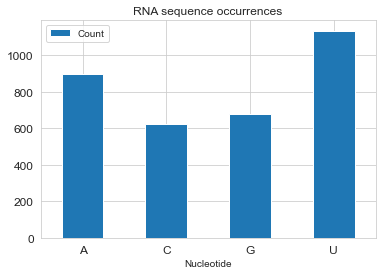

In [23]:
df.plot(kind="bar", x="Nucleotide", y="Count", rot=0, title="RNA sequence occurrences", fontsize=12);

In [24]:
unique_pdb_ids[:10]

['1jgn',
 '3ddc',
 '2r17',
 '3fdl',
 '2nl9',
 '3rep',
 '1gl2',
 '1bi7',
 '2wjv',
 '3lhr']